In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.rename(columns={'Gender':'gender','Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [7]:
df

,CustomerID,gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.shape

(200, 5)

In [9]:
df.isnull().sum()

CustomerID    0
gender        0
Age           0
income        0
score         0
dtype: int64

In [10]:
df.describe()

,CustomerID,Age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


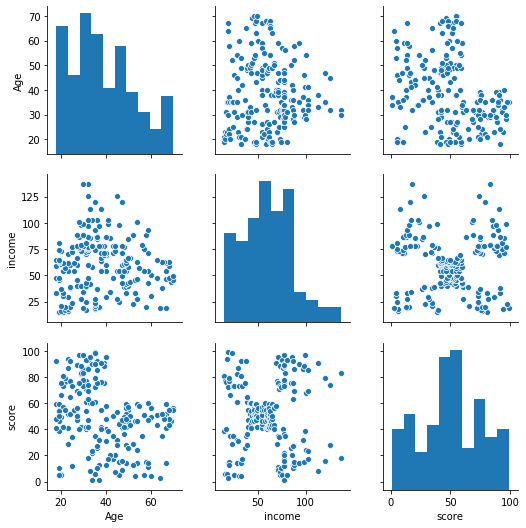

In [38]:
sns.pairplot(df[['Age','income','score']])

In [15]:
import sklearn.cluster as cluster 

In [16]:
kmeans=cluster.KMeans(n_clusters=5)

In [27]:
kmeans=kmeans.fit(df[['score','income']])

In [21]:
kmeans.cluster_centers_

array([[17.11428571, 88.2       ],
       [49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783]])

In [22]:
df['income_clusters']=kmeans.labels_

In [23]:
df

,CustomerID,gender,Age,income,score,income_clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,0
197,198,Male,32,126,74,3
198,199,Male,32,137,18,0


In [24]:
df['income_clusters'].value_counts()

1    81
3    39
0    35
4    23
2    22
Name: income_clusters, dtype: int64

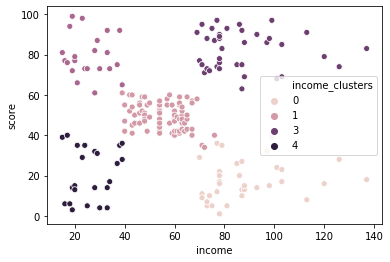

In [26]:
sns.scatterplot(x='income',y='score',hue='income_clusters',data=df)

In [28]:
kmeans=cluster.KMeans(n_clusters=2)

In [31]:
kmeans=kmeans.fit(df[['Age','score']])

In [32]:
kmeans.cluster_centers_

array([[46.16521739, 32.88695652],
       [28.95294118, 73.62352941]])

In [33]:
df['age_clusters']=kmeans.labels_

In [34]:
df['age_clusters'].value_counts()

0    115
1     85
Name: age_clusters, dtype: int64

In [35]:
df.head()

,CustomerID,gender,Age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,4,0


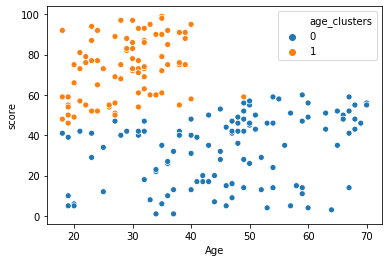

In [36]:
sns.scatterplot(x='Age',y='score',hue='age_clusters',data=df)

# Elbow Method

In [39]:
from sklearn.cluster import KMeans

In [40]:
k_range=range(1,12)
wcss= []
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)
    

F:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


In [41]:
wcss

[269981.28000000014,
 183069.17582751295,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25012.917069885472,
 21862.09267218289,
 19634.554629349972,
 17602.190468386776]

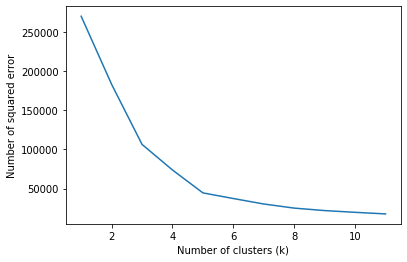

In [43]:
plt.xlabel('Number of clusters (k)')
plt.ylabel('Number of squared error')
plt.plot(k_range,wcss)

In [44]:
k_range_new=range(1,12)
wcss1= []
for k in k_range_new:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','score']])
    wcss1.append(km.inertia_)

F:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


In [45]:
wcss1

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23810.462233071372,
 19515.469235676614,
 15523.684014328754,
 13020.084512948228,
 11449.271770824495,
 10194.674013951735,
 9574.629548455534]

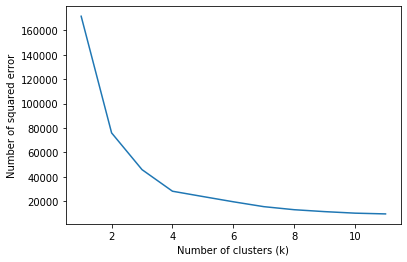

In [46]:
plt.xlabel('Number of clusters (k)')
plt.ylabel('Number of squared error')
plt.plot(k_range_new,wcss1)